In [26]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTE
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df3 =pd.read_csv("madrid 2022-01-02 to 2022-02-07.csv")
df = pd.concat([df, df2, df3], ignore_index=True)

df["preciptype"].unique()
df["icon"].unique()
df

#Categorizar la columna icon
labelencoder=LabelEncoder()
df["icono numero"]= labelencoder.fit_transform(df["icon"])
df


# Definir X (variables independientes)
X = df.drop(columns=["name","datetime","sunrise","sunset", "severerisk", "preciptype", "conditions", "description", "stations", "icon", "icono numero"], axis=1)

# Convertir y a una sola columna con valores categóricos
y = df["icono numero"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest con 100 árboles
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo con accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy * 100:.2f}%')




Precisión del Random Forest: 99.67%


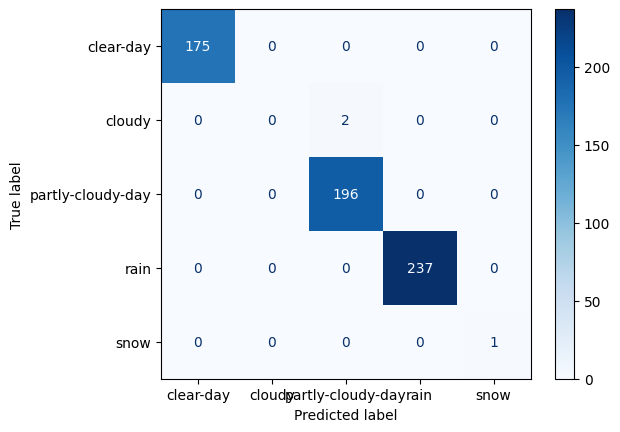

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["clear-day", "cloudy", "partly-cloudy-day", "rain", "snow"],cmap="Blues")




In [28]:
# Creamos la función para ejecutar el modelo con nuevos datos 
nombre_caracteristica = [
 "tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", 
    "humidity", "precip", "precipprob", "precipcover", "snow", "snowdepth", "windgust", 
    "windspeed", "winddir", "sealevelpressure", "cloudcover", "visibility", 
    "solarradiation", "solarenergy", "uvindex", "moonphase"
    
]

    
# Función para predecir la clase de un animal
def predecir(caracteristicas):
    # Solita al usuario los datos del nuevo registro
    print("Introduce los datos del nuevo registro para predecir su clase:")
    valores = []
    for e in caracteristicas:
        r = float(input(f"Introduce {e}:"))
        valores.append(r)
    # Crear un DataFrame de pandas con los mismos nombres de columna
    X_new = pd.DataFrame([valores], columns=caracteristicas)

    # Realizar la predicción con el modelo
    y_new = model.predict(X_new)

    # Mostrar el resultado de la predicción
    if y_new == 0:
        print("Clear-day")
    elif y_new == 1:
        print("Cloudy")
    elif y_new == 2:
        print("Partly-cloudy-day")
    elif y_new == 3:
        print("rain")
    else:
        print("snow")

predecir(nombre_caracteristica)


Introduce los datos del nuevo registro para predecir su clase:


ValueError: could not convert string to float: ''